# **Simulazioni N-body**
Notebook realizzato per gli Stage Estivi a Fisica presso l'Università di Ferrara e curato dai seguenti dottorandi: Stefano Arcari, Nicola Barbieri, Nicolò Raffuzzi (primo anno), Marco Bortolami (secondo anno), Shahbaz Alvi, Luca Caloni, Serena Giardiello (terzo anno).

#Introduzione
Come sarebbe vivere in un altro Universo? Cosa vedremmo? Come funzionerebbe tutto quanto con leggi della Fisica diverse da quelle dell'Universo in cui viviamo?

E' possibile rispondere a queste domande grazie all'aiuto delle **simulazioni**. Si può scrivere un programma, ad esempio usando il linguaggio di programmazione Python, che descrive il comportamento di un sistema fisico con le caratteristiche che vogliamo noi.

Ad esempio, possiamo simulare la caduta di un sasso con una gravità diversa dalla nostra. Oppure, possiamo studiare come si comporterebbe il Sistema Solare se non ci fosse Giove. Potremmo anche cercare di capire come sarebbe tutto l'Universo oggi se si fosse evoluto in modo diverso!!!

Durante questa attività impareremo a creare delle simulazioni in Python e ne visualizzeremo il risultato. Inizieremo con il moto di un corpo, per poi passare a 2 e a molti corpi che interagiscono con la forza di gravità. Infine, andremo a visualizzare il risultato di una simulazione con tantissimi corpi realizzata da fisici esperti che hanno simulato l'evoluzione dell'Universo in svariate condizioni.

---
Iniziamo col caricare i moduli necessari per questa esperienza.

In [ ]:
import numpy as np                  # modulo che fornisce le funzioni matematiche
import matplotlib.pyplot as plt     # modulo che permette di produrre grafici
from IPython.display import HTML    # modulo che permette a Python di visualizzare le simulazioni come brevi video
from matplotlib import animation    # modulo per produrre grafici animati, ovvero che cambiano col tempo

# Punto fermo

Ricordiamo il buon vecchio principio d'inerzia, o primo principio di Newton: "Un corpo che non è soggetto a forze (o in generale se la risultante delle forze è nulla) rimane in uno stato di quiete o continua a muoversi di moto rettilineo uniforme".

Proviamo a creare la più semplice simulazione possibile: un punto che rimane fermo dov'è man mano che il tempo passa. La semplicità di questo sistema ci permette di concentrarci sulle istruzioni per creare i grafici ed i video, che verranno ripetute in modo pressoché identico per le altre simulazioni. Iniziamo con la creazone di una figura vuota.

In [ ]:
# Queste righe di codice servono a creare una figura vuota, dalle dimensioni prestabilite (5x5 pollici),
# su cui verrà successivamente visualizzata l'immagine prodotta dal codice. Per farlo utilizziamo la funzione 
# figure del modulo matplotlib.pyplot (o, come lo abbiamo chiamato noi, plt).
# "ax" rappresenta il grafico dove andremo a mostrare la simulazione. Essa è composta da molteplici immagini,
# rappresentanti la situazione a diversi istanti di tempo, che vengono mostrare una dopo l'altra molto velocemente
# per dare l'impressione del movimento.
# D'ora in avanti, quando scriveremo "ax.qualcosa", staremo richiamando la funzione "qualcosa" dell'oggetto "ax"

fig = plt.figure(figsize=(5,5))
ax  = plt.subplot()

ax.set_xlim((0, 10))   # chiediamo di impostare 0 e 10 come valore minimo e massimo dell'asse x
ax.set_ylim((0, 10))   # chiediamo di impostare 0 e 10 come valore minimo e massimo dell'asse y
ax.set_xlabel('x')     # chiediamo di impostare la dicitura 'x' come etichetta dell'asse x
ax.set_ylabel('y')     # chiediamo di impostare la dicitura 'y' come etichetta dell'asse y

# Creiamo una serie di oggetti (sono dei grafici) che rappresentano, ciascuno, un corpo presente nella simulazione ad ogni istante di tempo.
# Per simulare un punto fermo ci serve solo un oggetto, che chiamiamo pt e che creiamo con la funzione plot. Questa funzione
# ci permette di disegnare il corpo alle coordinate desiderate e con le caratteristiche che vogliamo.
# Scegliamo che, per ora, le coordinate x (primo elemento dentro la parentesi) e y (secondo elemento dentro la parentesi)
# siano vuote: la dicitura [] mostrata sia per le x che per le y indica una lista vuota. Questa verrà successivamente riempita
# con le coordinate effettive del corpo presente nella nostra simulazione, ad ogni istante di tempo

pt, = ax.plot([], [], 'b.', ms=20)   # 'b.' imposta la visualizzazione dei corpi sotto forma di pallini blu
                                     # ms sta per "marker size", ovvero la dimensione del tratto, che scegliamo essere 20
                                     
# Chiudiamo il grafico perchè ora vedremmo solo delle immagini vuote non avendo ancora inserito i dati
plt.close()

Ora vediamo il cuore della simulazione: la funzione disegnaframe.

In [ ]:
# Questa è la funzione che calcola la posizione del punto ad un dato istante di tempo t.
# Queste informazioni vengono passate all'oggetto pt precedentemente creato in modo che il punto si sposti a quelle coordinate.
# La simulazione non fa altro che richiamare questa funzione per diversi istanti di tempo (diversi t) e aggiornare il grafico
# con la nuova posizione del punto

def disegnaframe(t):
    # posizione di partenza
    x0 = 5 #metri (m)
    y0 = 5 #metri (m)

    # ad ogni istante di tempo il punto rimane nella posizione x = 5 e y = 5, ovvero non si muove
    x = x0
    y = y0

    # assegnamo all'oggetto pt (rappresentante il grafico che visualizza il punto) l'attuale posizione del punto,
    # quindi la sua coordinata x e la sua coordinata y
    pt.set_data(x, y)

    # chiediamo di scrivere come titolo del grafico il valore dell'istante di tempo t a cui stiamo calcolando la posizione del punto
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
# Utilizziamo la funzione FuncAnimation del modulo matplotlib.animation per creare la nostra simulazione data
# da una successione di immagini create, ciascuna, dalla funzione disegnaframe per diversi istanti di tempo t.
# Utilizziamo 100 diversi istanti di tempo successivi (frames=100) e mostriamo la figura per ciascun
# istante di tempo successivo dopo un certo intervallo di tempo (interval=20 millisecondi)

anim = animation.FuncAnimation(fig, disegnaframe, frames=100, interval=20)

In [ ]:
# Utilizziamo il modulo HTML per convertire la nostra simulazione (chiamata precedentemente anim) in un video che visualizziamo!
# Come ci aspettavamo il punto rimane fermo man mano che il tempo passa

HTML(anim.to_html5_video())

# Punto in moto uniforme

Proviamo ora a movimentare un po' la situazione!!! Diamo una velocità (costante) al nostro corpo, rappresentato dal punto blu.

Ricordiamo che la legge oraria di un punto in moto uniforme è:
\begin{equation*} 
\mathbf{s}=\mathbf{s_{0}}+\mathbf{v_{0}}\left(t-t_{0}\right)
\end{equation*}

Le quantità in grassetto sono dei vettori, quindi calcoliamo separatamente la x e la y del punto. Inoltre, sceglieremo sempre $t_0=0$ per semplicità.

In [ ]:
# Come nella parte pecedente creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

# impostiamo i limiti dell'asse x e y e definiamo le loro etichette
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.set_xlabel('x')
ax.set_ylabel('y')

# creiamo l'insieme di grafici che prenderanno in input la posizione del punto, simulato ad ogni istante di tempo
# all'interno della funzione disegnaframe sotto riportata
pt, = ax.plot([], [], 'b.', ms=20)
plt.close()

<font color='red'>**Esercizio 1**</font>
Prova a scegliere i valori della posizione iniziale (x0 e y0) e della velocità (vx e vy). Ricorda che, mostrando gli assi tra 0 e 10, la posizione iniziale deve essere all'interno del grafico. Inoltre, il tempo passa molto velocemente nella nostra simulazione (passa 1 secondo nella simulazione ogni 20 millisecondi nella realtà), quindi usa velocità basse, come 0.01 m/s.

In [ ]:
# Come nella sezione "Punto Fermo" questa funzione contiene le informazioni sulla posizione del punto ad ogni istante di tempo
def disegnaframe(t):
    # scrivi qui sotto i valori da te scelti
    x0 = 
    y0 =
    vx =
    vy =
    
    # aggiorniamo la posizione del punto ad ogni istante di tempo t con la formula del moto rettilineo uniforme
    x = x0 + vx * t
    y = y0 + vy * t
    
    # assegnamo la nuova posizione al nostro grafico e scriviamo l'istante di tempo corrispondente come titolo dello stesso
    pt.set_data(x, y)
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
#@title
# Come nella sezione "Punto Fermo" questa funzione contiene le informazioni sulla posizione del punto ad ogni istante di tempo
def disegnaframe(t):
    # questa volta il punto parte dalla posizione x0 = y0 = 5 ma si muove lungo la direzione x
    # con velocità vx = 0.05, mentre non ha velocità lungo l'asse y
    x0 = 5     #m
    y0 = 5     #m
    vx = 0.05  #m/s
    vy = 0     #m/s
    
    # aggiorniamo la posizione del punto ad ogni istante di tempo t con la formula del moto rettilineo uniforme
    x = x0 + vx * t
    y = y0 + vy * t
    
    # assegnamo la nuova posizione al nostro grafico e scriviamo l'istante di tempo corrispondente come titolo
    pt.set_data(x, y)
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
# lanciamo la simulazione come nella sezione "Punto Fermo"
anim = animation.FuncAnimation(fig, disegnaframe, frames=100, interval=20)

In [ ]:
# e visualizziamo il risultato. Il punto si muove come ci aspettavamo!!
HTML(anim.to_html5_video())

Come detto prima, se la risultante delle forze applicate ad un punto è nulla allora il punto si muove uniformemente (a velocità costante).
<font color='red'>**Domanda**</font> Se un punto si muove uniformemente ma la sua traiettoria stavolta è una circonferenza, cosa possiamo dire sulla risultante delle forze? E' nulla o no? Potremmo simulare un moto circolare uniforme senza usare l'accelerazione?

# Punto in moto accelerato, forza costante

Introduciamo ora le forze e quindi l'accelerazione.

La legge oraria di un punto che si muove con accelerazione costante è: 
\begin{equation*} 
\mathbf{s}=\mathbf{s_{0}}+\mathbf{v_{0}}\left(t-t_{0}\right)+\frac{1}{2} \mathbf{a}\left(t-t_{0}\right)^{2}
\end{equation*} 
 
La velocità con cui si muove perciò è: 
\begin{equation*} 
\mathbf{v}=\mathbf{v_{0}}+\mathbf{a}\left(t-t_{0}\right)
\end{equation*}

Data un oggetto dotato di massa l'accelerazione che percepisce a causa di una forza costante è data dalla seconda legge di Newton:
\begin{equation}
\mathbf{a} = \frac{\mathbf{F}}{m}
\end{equation}

In [ ]:
# Come nelle sezioni pecedenti creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

# impostiamo i limiti dell'asse x e y e definiamo le loro etichette
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.set_xlabel('x')
ax.set_ylabel('y')

# creiamo l'insieme di grafici che prenderanno in input la posizione del punto, simulato ad ogni istante di tempo
# all'interno della funzione disegnaframe sotto riportata
pt, = ax.plot([], [], 'b.', ms=20) 
plt.close()

In [ ]:
# Come nelle sezioni precedenti definiamo la funzione che contiene le informazioni sulla posizione del punto ad ogni istante di tempo

def disegnaframe(t):
    # questa volta facciamo partire il punto dalla posizione x0 = 0, y0 = 5, applicandogli una forza costante lungo x
    # che lo farà muovere di moto uniformemente accelerato lungo l'asse x. Scegliamo che l'oggetto sia inizialmente fermo
    x0  = 0      #m
    y0  = 5      #m
    v0x = 0      #m/s
    v0y = 0      #m/s
    m   = 1      #kg
    Fx  = 0.01   #N
    Fy  = 0      #N

    # Per esercizio 2 (vedi sotto)
    #x0  =   #m
    #y0  =   #m
    #v0x =   #m/s
    #v0y =   #m/s
    #m   =   #kg
    #Fx  =   #N
    #Fy  =   #N

    # Per esercizio 3 (vedi sotto)
    #x0  =   #m
    #y0  =   #m
    #v0x =   #m/s
    #v0y =   #m/s
    #m   =   #kg
    #Fx  =   #N
    #Fy  =   #N
     
    # definiamo le accelerazioni lungo la direzione x ed y partendo dalla relativa forza applicata lungo la stessa direzione,
    # utilizzando la seconda legge di Newton
    # aggiorniamo poi la posizione del punto ad ogni istante t attraverso la formula del moto accelerato uniforme
    accx = Fx/m
    accy = Fy/m
    x = x0 + v0x * t + 0.5 * accx * t**2
    y = y0 + v0y * t + 0.5 * accy * t**2
    
    # assegnamo la nuova posizione al nostro grafico e scriviamo l'istante di tempo corrispondente come titolo
    pt.set_data(x, y)
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
# lanciamo la simulazione come nella sezioni precedenti
anim = animation.FuncAnimation(fig, disegnaframe, frames=100, interval=20)

In [ ]:
# e visualizziamo il risultato. Il punto accelera lungo la direzione x!!!
HTML(anim.to_html5_video())

<font color='red'>**Esercizio 2**</font>
Prova a simulare la caduta di un corpo inizialmente fermo. Come sarà direzionata la forza? Come puoi calcolarne il valore sulla Terra, dopo aver scelto il valore la massa?

*Suggerimento*: se il corpo va troppo veloce, prova a:
* cambiare gli intervalli degli assi (anziché tra 0 e 10 prova altri valori)
* far finta di essere su un altro pianeta, riducendo la forza di gravità

Potrebbe aiutarti, invece, ridurre la massa?

<font color='red'>**Esercizio 3**</font>
Prova a simulare il moto dei proiettili. Immagina che ad $x_0=0$ e $y_0=8$ ci sia un cannone che spara verso destra.

# Due punti, forza gravitazionale

Prendiamo come esempio il sistema composto dalla Terra e dalla Luna: la Luna orbita attorno alla Terra, cioè si muove di moto uniformemente accelerato, ovvero è in caduta libera verso la Terra.

<font color='red'>**Domanda**</font> Perchè i due corpi non collidono?

#<font color='blue'>**sistemare!**</font>
Risposta: la perdita di quota della Luna è compensata dal fatto che la sua velocità tangenziale è sufficientemente alta da permetterle di rimanere in "quota". Quando lanciamo un sasso, questo ad un certo punto comincerà a cadere verso il suolo: immaginando di poterlo lanciare con velocità sempre più alte ci rendiamo conto che cadrà sempre più lontano... e se lo lanciamo con forza sufficiente avrà una velocità tale per cui la sua perdita di quota varia come la curvatura della Terra, cioè rimane in quota.<br>

L'equazione che regola l'attrazione gravitazionale tra due corpi è la legge delle gravitazione universale di Newton:
\begin{equation}
\mathbf{F}_{1,2}\left(\mathbf{r}\right)=-\frac{G\,m_{1} m_{2}}{r^{2}}\,\mathbf{u_r}
\end{equation}

dove $\mathbf{u_r}$ è un vettore di lunghezza 1 metro che indica la direzione della forza e $r$ è la distanza tra la massa 1 e la massa 2 e in 2D può essere calcolata attraverso le coordinate delle due masse:
\begin{equation}
r=\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
\end{equation}

Riscriviamo la forza di gravità in modo diverso, cosicché sia più facile scriverla in Python. Moltiplichiamo sopra e sotto per il raggio $r$:
\begin{equation}
\mathbf{F}_{1,2}\left(\mathbf{r}\right)=-\frac{G\,m_{1} m_{2}}{r^{2}*r}\,\mathbf{u_r}*r=-\frac{G\,m_{1} m_{2}}{r^{3}}\,\mathbf{r}
\end{equation}

Ora $\mathbf{r}$ è un vettore lungo come la distanza tra le masse e che punta nella direzione della forza.

<font color='red'>**Esercizio 4**</font> Sotto troverai alcune parti di codice con un commento come questo: `### COMPLETA QUI ###`. Completa le parti mancanti in modo da far funzionare il codice.

**Passo 1:** Creiamo la solita figura vuota. Creiamo 2 oggetti pt dato che abbiamo 2 corpi.

In [ ]:
# Come nelle sezioni pecedenti creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

# impostiamo i limiti dell'asse x e y e definiamo le loro etichette
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.set_xlabel('x')
ax.set_ylabel('y')

# Questa volta vogliamo simulare l'attrazione gravitazionale tra DUE corpi, quindi abbiamo 2 punti da visualizzare
# Creiamo dunque due oggetti diversi che chiamiamo pt1 e pt2
pt1, = ax.plot([], [], 'b.', ms=20)
pt2, = ### COMPLETA QUI ###
plt.close()

In [ ]:
#@title
# Come nelle sezioni pecedenti creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

# impostiamo i limiti dell'asse x e y e definiamo le loro etichette
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.set_xlabel('x')
ax.set_ylabel('y')

# Questa volta vogliamo simulare l'attrazione gravitazionale tra DUE corpi, quindi abbiamo 2 punti da visualizzare
# Creiamo dunque due oggetti diversi che chiamiamo pt1 e pt2
pt1, = ax.plot([], [], 'b.', ms=20)     
pt2, = ax.plot([], [], 'b.', ms=20) 
plt.close()

**Passo 2:** Scriviamo una funzione che calcoli l'accelerazione usando la legge di Newton.

In [ ]:
# Per semplicità, mettiamo il calcolo dell'accelerazione in una funzone separata che chiamiamo getAcc
# Le varie quantità non saranno più numeri, ma vettori o matrici. Questo, nonostante sia concettualmente
# complicato, semplifica enormemente il codice che andremo a scrivere
# Ad esempio, mettiamo tutte le coordinate dentro una matrice che chiamiamo pos. Vediamo come è fatta:
#         0       1
#      ________________
#     |       |       |
#  0  |   x1  |   y1  |
#     |_______|_______|
#     |       |       |
#  1  |   x2  |   y2  |
#     |_______|_______|
#
# pos è una matrice che contiene le coordinate (x e y) della posizione delle due particelle:
#    pos[0,0] = x1 (coordinata x della prima particella) !!!ATTENZIONE!!! Python inizia sempre a contare da 0, quindi il primo elemento ha indice 0 e non 1
#    pos[0,1] = y1
#    pos[1,0] = x2
#    pos[1,1] = y2  
# quindi la riga 0 contiene la posizione della prima particella e la riga 1 della seconda
# invece la colonna 0 contiene tutte le x mentre la colonna 1 tutte le y
# E' complicato, ma è super comodo (altrimenti, dovremmo scrivere tantissime istruzioni in più, per niente)

def getAcc(pos):
    global mass           # definiamo il vettore per le masse come globale, cioè viene preso da fuori (mass[0] = m1, mass[1] = m2)

    N = pos.shape[0]      # salviamo il numero di righe di pos e quindi il numero di particelle (2 in questo caso)
    a = np.zeros((N,2))   # creiamo una matrice con N righe (come il numero di particelle) e 2 colonne (ax e ay)
                          # ciascuna riga conterrà l'accelerazione di una singola particella (è una matrice fatta come pos)
    G = 1.0               # assegnamo un valore alla costante di gravitazione universale 
                          # (!!NOTA!! non è quello reale ma un valore ideale per ottenere una bella animazione)

    softening = 0.1       # questo è un fattore che serve ad evitare divisioni per 0 quando le particelle sono molto vicine (vedere dentro ai cicli che seguono)

    # facciamo un ciclo su tutte le particelle (2 in questo caso) e per ciascuna calcoliamo l'accelerazione lungo le direzioni
    # x e y generata dalle altre particelle (1 in questo caso). Per farlo applichiamo la legge di Newton
    for i in range(N):
        # dobbiamo tenere a mente che ciascuna particella sente l'influenza di tutte le altre ma non di se stessa
        # la dicitura np.delete(range(N), i) ci assicura che j sia diverso da i, perché elimina i dalla lista di valori
        for j in np.delete(range(N), i):
            dx = pos[j,0] - ### COMPLETA QUI ###   # calcoliamo la distanza tra le particelle lungo x
            dy =            ### COMPLETA QUI ###   # calcoliamo la distanza tra le particelle lungo y

            # calcoliamo l'inverso della distanza r tra le particelle al cubo
            # np.sqrt è la radice quadrata
            # **3 è l'elevazione al cubo
            # aggiungiamo un valore diverso da 0 alla distanza nella parentesi per evitare
            # di dividere per 0 quando le particelle sono sovrapposte (dx = dy = 0)
            # se ciò accadesse il codice darebbe errore e non sarebbe in grado di produrre la simulazione
            inv_r3 = 1/np.sqrt(dx**2 + dy**2 + softening**2)**3

            # sommiamo all'accelerazione totale della particella i quella della particella j
            a[i,0] +=  G * (dx * inv_r3) * mass[j];            
            a[i,1] +=  G * (dy * inv_r3) * mass[j];
            
    return a   # mandiamo in output l'accelerazione

In [ ]:
#@title
# Per semplicità, mettiamo il calcolo dell'accelerazione in una funzone separata che chiamiamo getAcc
# Le varie quantità non saranno più numeri, ma vettori o matrici. Questo, nonostante sia concettualmente
# complicato, semplifica enormemente il codice che andremo a scrivere
# Ad esempio, mettiamo tutte le coordinate dentro una matrice che chiamiamo pos. Vediamo come è fatta:
#         0       1
#      ________________
#     |       |       |
#  0  |   x1  |   y1  |
#     |_______|_______|
#     |       |       |
#  1  |   x2  |   y2  |
#     |_______|_______|
#
# pos è una matrice che contiene le coordinate (x e y) della posizione delle due particelle:
#    pos[0,0] = x1 (coordinata x della prima particella) !!!ATTENZIONE!!! Python inizia sempre a contare da 0, quindi il primo elemento ha indice 0 e non 1
#    pos[0,1] = y1
#    pos[1,0] = x2
#    pos[1,1] = y2  
# quindi la riga 0 contiene la posizione della prima particella e la riga 1 della seconda
# invece la colonna 0 contiene tutte le x mentre la colonna 1 tutte le y
# E' complicato, ma è super comodo (altrimenti, dovremmo scrivere tantissime istruzioni in più, per niente)

def getAcc(pos):
    global mass           # definiamo il vettore per le masse come globale, cioè viene preso da fuori (mass[0] = m1, mass[1] = m2)

    N = pos.shape[0]      # salviamo il numero di righe di pos e quindi il numero di particelle (2 in questo caso)
    a = np.zeros((N,2))   # creiamo una matrice con N righe (come il numero di particelle) e 2 colonne (ax e ay)
                          # ciascuna riga conterrà l'accelerazione di una singola particella (è una matrice fatta come pos)
    G = 1.0               # assegnamo un valore alla costante di gravitazione universale 
                          # (!!NOTA!! non è quello reale ma un valore ideale per ottenere una bella animazione)

    softening = 0.1       # questo è un fattore che serve ad evitare divisioni per 0 quando le particelle sono molto vicine (vedere dentro ai cicli che seguono)

    # facciamo un ciclo su tutte le particelle (2 in questo caso) e per ciascuna calcoliamo l'accelerazione lungo le direzioni
    # x e y generata dalle altre particelle (1 in questo caso). Per farlo applichiamo la legge di Newton
    for i in range(N):
        # dobbiamo tenere a mente che ciascuna particella sente l'influenza di tutte le altre ma non di se stessa
        # la dicitura np.delete(range(N), i) ci assicura che j sia diverso da i, perché elimina i dalla lista di valori
        for j in np.delete(range(N), i):
            dx = pos[j,0] - pos[i,0]   # calcoliamo la distanza tra le particelle lungo x
            dy = pos[j,1] - pos[i,1]   # calcoliamo la distanza tra le particelle lungo y

            # calcoliamo l'inverso della distanza r tra le particelle al cubo
            # np.sqrt è la radice quadrata
            # **3 è l'elevazione al cubo
            # aggiungiamo un valore diverso da 0 alla distanza nella parentesi per evitare
            # di dividere per 0 quando le particelle sono sovrapposte (dx = dy = 0)
            # se ciò accadesse il codice darebbe errore e non sarebbe in grado di produrre la simulazione
            inv_r3 = 1/np.sqrt(dx**2 + dy**2 + softening**2)**3

            # sommiamo all'accelerazione totale della particella i quella della particella j
            a[i,0] +=  G * (dx * inv_r3) * mass[j];            
            a[i,1] +=  G * (dy * inv_r3) * mass[j];
            
    return a   # mandiamo in output l'accelerazione

**Passo 3:** Diamo delle condizioni iniziali e calcoliamo l'accelerazione iniziale.

In [ ]:
# impostiamo il numero di particelle (questo codice funziona solo per due particelle poichè abbiamo solo 2 oggetti, pt1 e pt2)
# e l'intervallo di tempo che dice al codice ogni quanto aggiornare la posizione delle particelle
N  = 2    
dt = 0.01

# impostiamo le condizioni iniziali
mass = np.ones((N,1))*20.0/N         # le masse sono contenute in un vettore e hanno tutte lo stesso valore (20/2 = 10 kg)
pos  = np.random.normal(5,2,(N,2))   # assegnamo posizioni casuali alle 2 particelle
vel  = np.random.normal(0,1,(N,2))   # assegnamo velocità casuali alle due particelle
# np.ones crea una serie di 1 della dimensione che vogliamo. Noi ne vogliamo tanti quanti il numero di particelle, cioè N. Poi
# moltiplichiamo gli 1 per il valore delle masse (massa totale / numero particelle)
# np.random.normal(A,B,C) crea dei numeri casuali:
#     A è la media
#     B indica quanto i valori si possono allontanare da A (più è alto, più si discostano)
#     C è la dimensione del vettore o della matrice: (N,2) vuol dire che ha N righe e 2 colonne

# calcoliamo l'accelerazione sentita da ciascuna particella date le condizioni iniziali appena impostate
acc = getAcc(pos)

# Scriviamo i valori delle quantità sopra calcolate. Nota la dimensione di vettori e matrici
print("masse:")
print(mass)
print()

print("posizioni:")
print(pos)
print()

print("velocità:")
print(vel)
print()

print("accelerazioni:")
print(acc)

masse:
[[10.]
 [10.]]

posizioni:
[[6.94463688 7.46947515]
 [1.21794836 7.47647083]]

velocità:
[[ 0.59983564  0.31102886]
 [-0.11714313  0.57342049]]

accelerazioni:
[[-0.30478479  0.00037232]
 [ 0.30478479 -0.00037232]]


**Passo 4:** La nostra cara vecchia disegnaframe. Calcoliamo, ad ogni tempo t, l'accelerazione e la posizione delle particelle.

In [ ]:
def disegnaframe(t):
    # le posizioni, velocità, accelerazioni e il conteggio del tempo devono essere aggiornati ogni volta che questa funzione viene chiamata 
    # ed il nuovo valore deve essere salvato e accessibile anche fuori dalla funzione, per questo usiamo variabili globali, ovvero che valgono ovunque
    global pos
    global vel
    global acc
    global dt
    
    # Ora ci si presenta un problema:
    # per calcolare l'accelerazione ad un certo istante ci serve la posizione a quell'istante, ma
    # per calcolare la posizione ad un certo istante ci serve l'accelerazione a quell'istante!!!
    # Non possiamo calcolarle contemporaneamente... Come possiamo risolvere?

    # Ci sono diversi algoritmi che risolvono il problema in modi diversi. Uno di questi è il leapfrog, composto di 4 passi:
    # 1) aggiorno la velocità usando l'accelerazione non aggiornata per metà tempo
    vel += acc * dt/2.0

    # 2) aggiorno la posizione con la velocità appena calcolata
    pos += vel * dt

    # 3) ricalcolo l'accelerazione di ciascuna particella con la nuova posizione
    acc = getAcc(pos)

    # 4) aggiorno la velocità usando l'accelerazione aggiornata per un'altra metà di tempo
    vel += acc * dt/2.0

    # assegnamo le posizioni aggiornate ai due grafici (uno per ciascuna particella) e scriviamo l'istante di tempo corrispondente come titolo dell'immagine
    pt1.set_data()   ### COMPLETA QUI ###
    pt2.set_data()  ### COMPLETA QUI ###
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
#@title
def disegnaframe(t):
    # le posizioni, velocità, accelerazioni e il conteggio del tempo devono essere aggiornati ogni volta che questa funzione viene chiamata 
    # ed il nuovo valore deve essere salvato e accessibile anche fuori dalla funzione, per questo usiamo variabili globali, ovvero che valgono ovunque
    global pos
    global vel
    global acc
    global dt
    
    # Ora ci si presenta un problema:
    # per calcolare l'accelerazione ad un certo istante ci serve la posizione a quell'istante, ma
    # per calcolare la posizione ad un certo istante ci serve l'accelerazione a quell'istante!!!
    # Non possiamo calcolarle contemporaneamente... Come possiamo risolvere?

    # Ci sono diversi algoritmi che risolvono il problema in modi diversi. Uno di questi è il leapfrog, composto di 4 passi:
    # 1) aggiorno la velocità usando l'accelerazione non aggiornata per metà tempo
    vel += acc * dt/2.0

    # 2) aggiorno la posizione con la velocità appena calcolata
    pos += vel * dt

    # 3) ricalcolo l'accelerazione di ciascuna particella con la nuova posizione
    acc = getAcc(pos)

    # 4) aggiorno la velocità usando l'accelerazione aggiornata per un'altra metà di tempo
    vel += acc * dt/2.0

    # assegnamo le posizioni aggiornate ai due grafici (uno per ciascuna particella) e scriviamo l'istante di tempo corrispondente come titolo dell'immagine
    pt1.set_data(pos[0,0], pos[0,1])
    pt2.set_data(pos[1,0], pos[1,1])
    ax.set_title('Tempo = {0:4d} s'.format(t))

**Passo 5:** Costruiamo il video!!!

In [ ]:
# lanciamo la simulazione
anim = animation.FuncAnimation(fig, disegnaframe, frames=100, interval=20)

In [ ]:
# vedete come le particelle tendono ad attrarsi? Potrebbe essere difficile con due sole particelle, tra poco proveremo con un numero maggiore
HTML(anim.to_html5_video())

# N punti, forza gravitazionale

Ora entriamo nel vivo delle simulazioni N-body. Proviamo a simulare non 2, ma un certo numero di corpi che chiamiamo N. Questi corpi interagiscono grazie alla sola forza di gravità e hanno tutti la stessa massa.

In [ ]:
# Come nelle sezioni pecedenti creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

# è normale che, a differenza dei casi precedenti, qui non ci sia altro (vedi sotto)

plt.close()

In [ ]:
# La funzione getAcc calcola l'accelerazione lungo x e lungo y date le posizioni di tutte le particelle.
# La funzione è identica a qualla definita per sole 2  particelle, nella sezione precedente, con la differenza
# che la matrice pos avrà questa volta N righe, pari al numero di particelle scelto, che può essere diverso da 2

def getAcc(pos):
    global mass

    N = pos.shape[0]
    a = np.zeros((N,2))

    G = 1.0     

    softening = 0.1

    for i in range(N):
        for j in np.delete(range(N), i):
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            inv_r3 = (dx**2 + dy**2 + softening**2)**(-1.5)

            a[i,0] +=  G * (dx * inv_r3) * mass[j]
            a[i,1] +=  G * (dy * inv_r3) * mass[j]
            
    return a

In [ ]:
# impostiamo l'intervallo di tempo tra un aggiornamento della posizione delle particelle e quello successivo
dt = 0.01
# decidiamo il numero di particelle che vogliamo nella simulazione
N = 10

# impostiamo le condizioni iniziali
mass = 20.0*np.ones((N,1))/N  
pos  = np.random.normal(5,2,(N,2))
vel  = np.random.normal(0,1,(N,2))

# calcoliamo l'accelerazione di ciascuna particella data la loro posizione iniziale appena impostata casualmente
acc = getAcc(pos)

In [ ]:
# Come nelle sezione precedente definiamo la funzione che contiene le informazioni sulla posizione del punto ad ogni istante di tempo;
# la posizione è aggiornata, di nuovo, utilizzando il metodo dell'half-kick
def disegnaframe(t):
    global pos
    global vel
    global acc
    global dt
    
    # calcoliamo la posizione aggiornata dopo mezzo-passo
    vel += acc * dt/2.0
    pos += vel * dt

    # aggiorniamo l'accelerazione delle particelle, date le nuove posizioni
    acc = getAcc(pos)

    # calcoliamo la velocità finale all'istante t dopo un altro mezzo-passo
    vel += acc * dt/2.0

    # abbiamo ora un numero N di particelle e per ciascuna di esse dobbiamo creare un oggetto che contenga il grafico 
    # della singola particella, data la sua posizione aggiornata all'istante t
    N = pos.shape[0]
    pts = []             # definiamo una lista di oggetti che conterranno i grafici con la posizione di ogni particella
    ax.clear()           # questo comando cancella qualsiasi grafico già esistente, cosa succede se lo togliamo?
    for i in range(N):
        pts.append(ax.plot(pos[i,0], pos[i,1], 'b.', ms=20)) # aggiungiamo alla lista un corpo alla volta con un ciclo

    # impostiamo i limiti degli assi, le loro etichette e il titolo con l'istante di tempo attuale
    # dobbiamo farlo dentro alla funzione disegnaframe, diversamente dai casi precedenti, perchè ad ogni
    # chiamata della funzione disegnaframe i settaggi del grafico ax vengono cancellati dal comando ax.clear()
    ax.set_xlim((0, 10))
    ax.set_ylim((0, 10))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
# lanciamo la simulazione
anim = animation.FuncAnimation(fig, disegnaframe, frames=100, interval=20)

In [ ]:
# e finalmente abbiamo un sistema di N particelle che interagiscono gravitazionalmente, 
# ma cosa succede se 2 particelle arrivano molto vicino l'una all'altra?
HTML(anim.to_html5_video())

<font color='red'>**Esercizio 5**</font> Prova a modificare alcune cose e vedere cosa succede. Ad esempio, prova a:
* modificare il numero di particelle
* modificare il valore totale della massa (inizialmente 20 kg)
* impostare le velocità iniziali a zero.
* generare le masse casualmente, in modo che abbiano valori diversi
* modificare la costante di gravità G. Ora abbiamo usato un valore non corretto perché, come avrai notato, oggetti di 10 kg non si mettono ad orbitare uno attorno all'altro! Sarebbe un po' difficile programmare in queste condizioni... Prova ad impostare G al valore corretto per il nostro Universo.
* commentare l'istruzione `ax.clear()`

<font color='red'>**Domanda**</font> Se i pianeti avessero una carica elettrica diversa da zero, come dovremmo modificare la nostra simulazione per tenerne conto?

<font color='red'>**Domanda**</font> Cosa succederebbe se disponessimo i nostri N corpi equidistantemente dagli altri? Tanto per capirci disponiamo i corpi a formare una griglia regolare. E se invece di avere N corpi disposti su una griglia regolare ne avessimo un numero infinito? Cosa succederebbe alla loro disposizione?

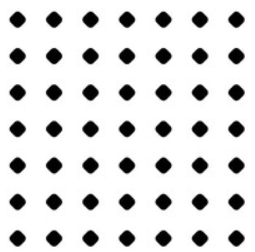

# N punti, forza gravitazionale, merging

Ti sarà capitato di vedere alcuni corpi venire a contatto e non urtarsi. Se questi puntini che si muovono fossero delle stelle, di certo non si passerebbero attraverso senza qualche effetto disastroso. Quello che succede con alcuni corpi, come le stelle di neutroni e i buchi neri, è che si mettono a danzare uno attorno all'altro finché non si avvicinano tanto da unirsi in un corpo solo. Proviamo a simulare in modo molto semplice questo effetto, chiamato **merging** (o coalescenza). Aggiungiamo quindi una caratteristica alla nostra simulazione: se i corpi sono molto vicini (entro una certa soglia), si uniscono in un corpo con una massa uguale alla somma delle masse dei corpi che collidono.

In [ ]:
# Come nelle sezioni pecedenti creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

plt.close()

In [ ]:
# Definiamo nuovamente la funzione che calcola l'accelerazione di ciascuna delle N particelle, data la loro posizione. E' uguale a quella sopra.
def getAcc(pos):
    global mass

    N = pos.shape[0]
    a = np.zeros((N,2))

    G = 1.0     

    softening = 0.000001

    for i in range(N):
        for j in np.delete(range(N), i):
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            inv_r3 = (dx**2 + dy**2 + softening**2)**(-1.5) # questo è un modo più compatto per scrivere 1/r^3

            a[i,0] +=  G * (dx * inv_r3) * mass[j]
            a[i,1] +=  G * (dy * inv_r3) * mass[j]
    
    return a

In [ ]:
# Adesso vogliamo inserire una funzione che faccia unire due particelle in un'unica particella (coalescenza) quando queste sono molto vicine.
# Questa funzione deve:
#     - eliminare una delle due particelle che si uniscono, ovvero eliminare la sua posizione, velocità, accelerazione e massa dalle rispettive matrici
#     - assegnare alla particella che rimane la somma delle masse delle due particelle che si uniscono, come nuovo valore di massa
def merge():
    global pos
    global vel
    global acc
    global mass
    
    N = pos.shape[0]   # il numero di particelle sarà sempre dato dalla dimensione (numero di righe) della matrice delle posizioni pos
                       # questo è fondamentale perchè questo numero diminuerà ogni volta che due particelle si uniscono
    soglia_r = 0.01    # impostiamo la soglia di coalescenza, ovvero la distanza tra 2 particelle necessaria affinchè si uniscano
    
    # cicliamo su ogni coppia di particelle, calcolandone la distanza e verificando se quest'ultima sia minore della soglia di coalescenza
    # se lo è segnamo l'indice corrispondente a una delle 2 particelle che si uniscono in una lista,
    # aggiorniamo la velocità della particella superstite attraverso la conservazione della quantità di moto
    # e le assegnamo la somma delle due masse come nuova massa
    merge_indices = []
    for i in range(N):
        for j in np.arange(i+1,N,1):
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            if((dx**2 + dy**2) < soglia_r):
                merge_indices.append(i)
                vel[j,:] = (mass[j]*vel[j,:] + mass[i]*vel[i,:])/(mass[j] + mass[i])
                mass[j] += mass[i] 

    # ora che abbiamo una lista con gli indici corrispondenti a tutte le particelle da eliminare (merge_indices),
    # la usiamo per eliminare posizione, velocità, accelerazione e massa di tutte queste particelle dalle relative matrici o array
    pos  = np.delete(pos, merge_indices, axis=0)
    vel  = np.delete(vel, merge_indices, axis=0)
    acc  = np.delete(acc, merge_indices, axis=0)
    mass = np.delete(mass, merge_indices, axis=0)

In [ ]:
# impostiamo l'intervallo di tempo tra un aggiornamento della posizione delle particelle e quello successivo
dt = 0.01
# decidiamo il numero di particelle che vogliamo nella simulazione
N = 25

# impostiamo le condizioni iniziali
mass = np.ones((N,1))*20.0/N  
pos  = np.random.normal(5,2,(N,2))
vel  = np.random.normal(0.1,1,(N,2))
acc  = np.zeros((N,2))

mass0 = mass[0] # salviamo il valore della massa iniziale delle particelle, ci servirà per riscalare la grandezza delle particelle
merge()         # chiamiamo la funzione di coalescenza, che controlla se ci sono già particelle molto vicine tra loro ed in caso affermativo le unisce

# calcoliamo l'accelerazione iniziale delle particelle sopravvissute
acc = getAcc(pos)

In [ ]:
# Come nelle sezione precedente definiamo la funzione che contiene le informazioni sulla posizione del punto ad ogni istante di tempo;
# la posizione è aggiornata utilizzando il metodo dell'half-kick (o leapfrog)
def disegnaframe(t):
    global pos
    global vel
    global acc
    global dt
    
    # calcoliamo la posizione aggiornata dopo mezzo-passo
    vel += acc * dt/2.0
    pos += vel * dt
    
    # controlliamo se, date le nuove posizioni, ci sono particelle da unire e se si le uniamo
    merge()

    # aggiorniamo l'accelerazione delle particelle
    acc = getAcc(pos)

    # calcoliamo la velocità finale all'istante t dopo un altro mezzo-passo
    vel += acc * dt/2.0

    # come nella sezione precedente assegnamo la posizione aggiornata di ogni particella ai rispettivi oggetti grafico
    N = pos.shape[0]
    pts = []
    ax.clear()
    for i in range(N):
        pts.append(ax.plot(pos[i,0], pos[i,1], 'b.', ms=20*(mass[i]/mass0)**0.5))   # la dimensione del punto con cui viene rappresentata ciascuna particella
                                                                                    # viene riscalata con il rapporto tra la sua massa e quella iniziale
                                                                                    # massa maggiore --> dimensione maggiore
  
    # settiamo il grafico
    ax.set_xlim((0, 10))
    ax.set_ylim((0, 10))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
# lanciamo la simulazione
anim = animation.FuncAnimation(fig, disegnaframe, frames=200, interval=20)

In [ ]:
# siamo molto vicini ad aver ottenuto una vera e propria simulazione a N-corpi!!!
# Se non vedi alcuna coalescenza, prova ad eseguire di nuovo le celle di questa sezione
HTML(anim.to_html5_video())

## N punti, forza gravitazionale, merging, 3D !!!

Non so se ve ne siete mai accorti, ma noi non viviamo in un Universo in 2 dimensioni. Viviamo in un Universo a 3 dimensioni spaziali (lunghezza, altezza, profondità che chiamiamo x, y, z)*. Proviamo ad aggiungere la terza dimensione spaziale! Avendo usato delle matrici, serviranno solo delle piccole modifiche.

*in realtà viviamo in un Universo a 4 dimensioni: la quarta è il tempo! Chiedi a qualche tutor per maggiori informazioni!

*alcune teorie prevedono che la realtà abbia altre dimensioni a cui non abbiamo accesso! Metti in difficoltà qualche tutor chiedendo spiegazioni!

In [ ]:
from mpl_toolkits import mplot3d   # modulo per produrre grafici 3D

# Come nelle sezioni precedenti creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')

plt.close()

In [ ]:
# definiamo la funzione che calcola l'accelerazione di ciascuna particella, come nei casi precedenti
# questa volte però la posizione, velocità e accelerazione della singola particella avranno 
# una componente x, una y ma anche una z; quindi le matrici corrispondneti avranno ora N righe e 3 colonne
def getAcc(pos):
    global mass

    N = pos.shape[0]
    a = np.zeros((N,3))
    
    G = 1.0

    softening = 0.000001

    for i in range(N):
        for j in np.delete(range(N), i):
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            dz = pos[j,2] - pos[i,2]
            inv_r3 = (dx**2 + dy**2 + dz**2 + softening**2)**(-1.5)

            a[i,0] +=  G * (dx * inv_r3) * mass[j]
            a[i,1] +=  G * (dy * inv_r3) * mass[j]
            a[i,2] +=  G * (dz * inv_r3) * mass[j]

    return a

In [ ]:
def merge():
    global pos
    global vel
    global acc
    global mass
    
    N = pos.shape[0]   # numero di particelle sempre dato dal numero di righe di pos

    soglia_r = 0.01     # soglia di coalescenza
    
    # ciclo su ciascuna coppia di particelle per segnarsi quelle da unire, sommare le masse e aggiornare le velocità con la conservazione del momento
    merge_indices = []
    for i in range(N):
        for j in np.arange(i+1,N,1):
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            dz = pos[j,2] - pos[i,2]
            if((dx**2 + dy**2 + dz**2) < soglia_r):
                merge_indices.append(i)
                vel[j,:] = (mass[j]*vel[j,:] + mass[i]*vel[i,:])/(mass[j] + mass[i])
                mass[j] += mass[i] 

    # per ogni coppia di particelle che si mergiano ne eliminiamo una da tutte le matrici e array
    pos  = np.delete(pos,merge_indices,axis=0)
    vel  = np.delete(vel,merge_indices,axis=0)
    acc  = np.delete(acc,merge_indices,axis=0)
    mass = np.delete(mass,merge_indices,axis=0)

In [ ]:
# impostiamo l'intervallo di tempo tra un aggiornamento della posizione delle particelle e quello successivo
dt = 0.01
# decidiamo il numero di particelle che vogliamo nella simulazione
N = 25

# impostiamo le condizioni iniziali, questa volta tutte su matrici Nx2 anzichè Nx3
mass = 20.0*np.ones((N,1))/N  
pos  = np.random.normal(5,2,(N,3))
vel  = np.random.normal(0.1,1,(N,3))
acc  = np.zeros((N,3))

# salviamo il valore iniziale della massa delle particelle e controlliamo per particelle che si uniscono con la funzione merge()
mass0 = mass[0]
merge()

# calcoliamo le accelerazioni iniziali
acc = getAcc(pos)

In [ ]:
# Come nelle sezione precedente definiamo la funzione che contiene le informazioni sulla posizione del punto ad ogni istante di tempo;
# la posizione è aggiornata utilizzando il metodo dell'half-kick
def disegnaframe(t):
    global pos
    global vel
    global acc
    global dt
    
    # calcoliamo la posizione aggiornata dopo mezzo-passo
    vel += acc * dt/2.0
    pos += vel * dt
    
    # controlliamo se, date le nuove posizioni, ci sono particelle da unire e se si le uniamo
    merge()

    # calcoliamo la velocità finale all'istante t dopo un altro mezzo-passo
    acc = getAcc(pos)

    # come nella sezione precedente assegnamo la posizione aggiornata di ogni particella ai rispettivi oggetti grafico
    vel += acc * dt/2.0

    # come nella sezione precedente assegnamo la posizione aggiornata di ogni particella ai rispettivi oggetti grafico
    N = pos.shape[0]
    pts = []
    ax.clear()
    for i in range(N):
        pts.append(ax.plot3D([pos[i,0]], [pos[i,1]], [pos[i,2]], 'b.', ms=20*(mass[i]/mass0)**0.5))
    #dobbiamo scrivere [pos[i,0]] e non pos[i,0] perché ax.plot3D() vuole delle liste come coordinate
  
    # settiamo il grafico, ovviamente abbiamo anche un asse z
    ax.set_xlim((0, 10))
    ax.set_ylim((0, 10))
    ax.set_zlim((0, 10))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
# lanciamo la simulazione
anim = animation.FuncAnimation(fig, disegnaframe, frames=200, interval=20)

In [ ]:
# siamo ancora più vicini all'Universo reale!!!
HTML(anim.to_html5_video())

Un esempio di **merging** è quello tra **buchi neri**, gli oggetti più compatti che esistano nell'Universo. Vediamone una simulazione.

Il seguente video viene dalla simulazione numerica del merging di due buchi neri, che produrrebbe un'onda gravitazionale (la parte in basso nel video) consistente con il segnale osservato dai rivelatori di Ligo e Virgo il 21/05/2019.

Un'onda gravitazionale è un'increspatura dello spazio-tempo dovuta al moto di corpi particolarmente densi e massivi. Nella nostra simulazione non teniamo conto di questo effetto, che può essere descritto solamnte considerando le leggi della Relatività Generale. La situazione si complicherebbe parecchio!

fonte: https://www.youtube.com/watch?v=zRmwtL6lvIM&t=5s&ab_channel=caltech

In [ ]:
from IPython.display import Video

Video("Numerical simulation of a heavy black-hole merger (GW190521).mp4", embed = True)

# Ora plottiamo una vera simulazione N-body

#<font color='blue'>**Sistemare da qui in poi!**</font>

Per andare oltre, con la nostra semplice simulazione N-body, ci vorrebbe molto tempo. Questo tipo di simulazioni, se fatte il più realisticamente possibile e con un gran numero di corpi, richiedono fatica e mesi di lavoro di decine di fisici esperti. Proviamo a visualizzare il risultato di alcune di queste simulazioni: quelle di QUIJOTE*.

*Quando gli scienziati ottengono un risultato nuovo, scrivono un articolo che spiega quello che hanno fatto per ottenerlo. Se vuoi vedere com'è un vero articolo scientifico, puoi dare un'occhiata a quello che descrive le simulazioni che andiamo a visualizzare: https://arxiv.org/pdf/1909.05273.pdf

In [ ]:
# importiamo tutti i moduli necessari al funzionamento del codice
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# impostiamo la dimensione della simulazione e delle galassie al suo interno
gal_size = 0.7 
sim_len = 500 

# carichiamo il catalogo di galassie preso da Quijote Simulation
Data_0 = h5py.File('/content/drive/My Drive/Lavoro per JN stage estivi/molino.z0.0.fiducial.nbody0.hod0.hdf5', 'r')   # !!!ATTENZIONE!!!
                                                                                                                      # INSERIRE PATH CORRETTO !!!!!!!!

# carichiamo le posizione delle galassie dal catalogo
Gal_Pos_data_0 = Data_0['pos'] 

# impostiamo il grafico
plt.figure(figsize=(5,5))
ax_0 = plt.axes()
ax_0.set_facecolor("black")
max_x = sim_len
max_y = sim_len
max_z = sim_len

# grafichiamo solo le galassie dentro alla regione considerata (coincidente con un cubo di lato pari alla dimensione della simulazione sim_len)
for i in range(np.shape(Gal_Pos_data_0)[0]):
    if Gal_Pos_data_0[i,0] < max_x and Gal_Pos_data_0[i,1] < max_y and Gal_Pos_data_0[i,2] < max_z: 
        plt.plot(Gal_Pos_data_0[i,0], Gal_Pos_data_0[i,1], marker='o', markersize=gal_size, color='deepskyblue', alpha=1-(Gal_Pos_data_0[i,2]/max_z))

# visualizziamo il grafico solamente in 2D, non mostriamo l'asse z        
plt.xlim([0, max_x])
plt.ylim([0, max_y])

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


OSError: ignored

The large scale structure is made up of many galaxies located in groups and filaments. 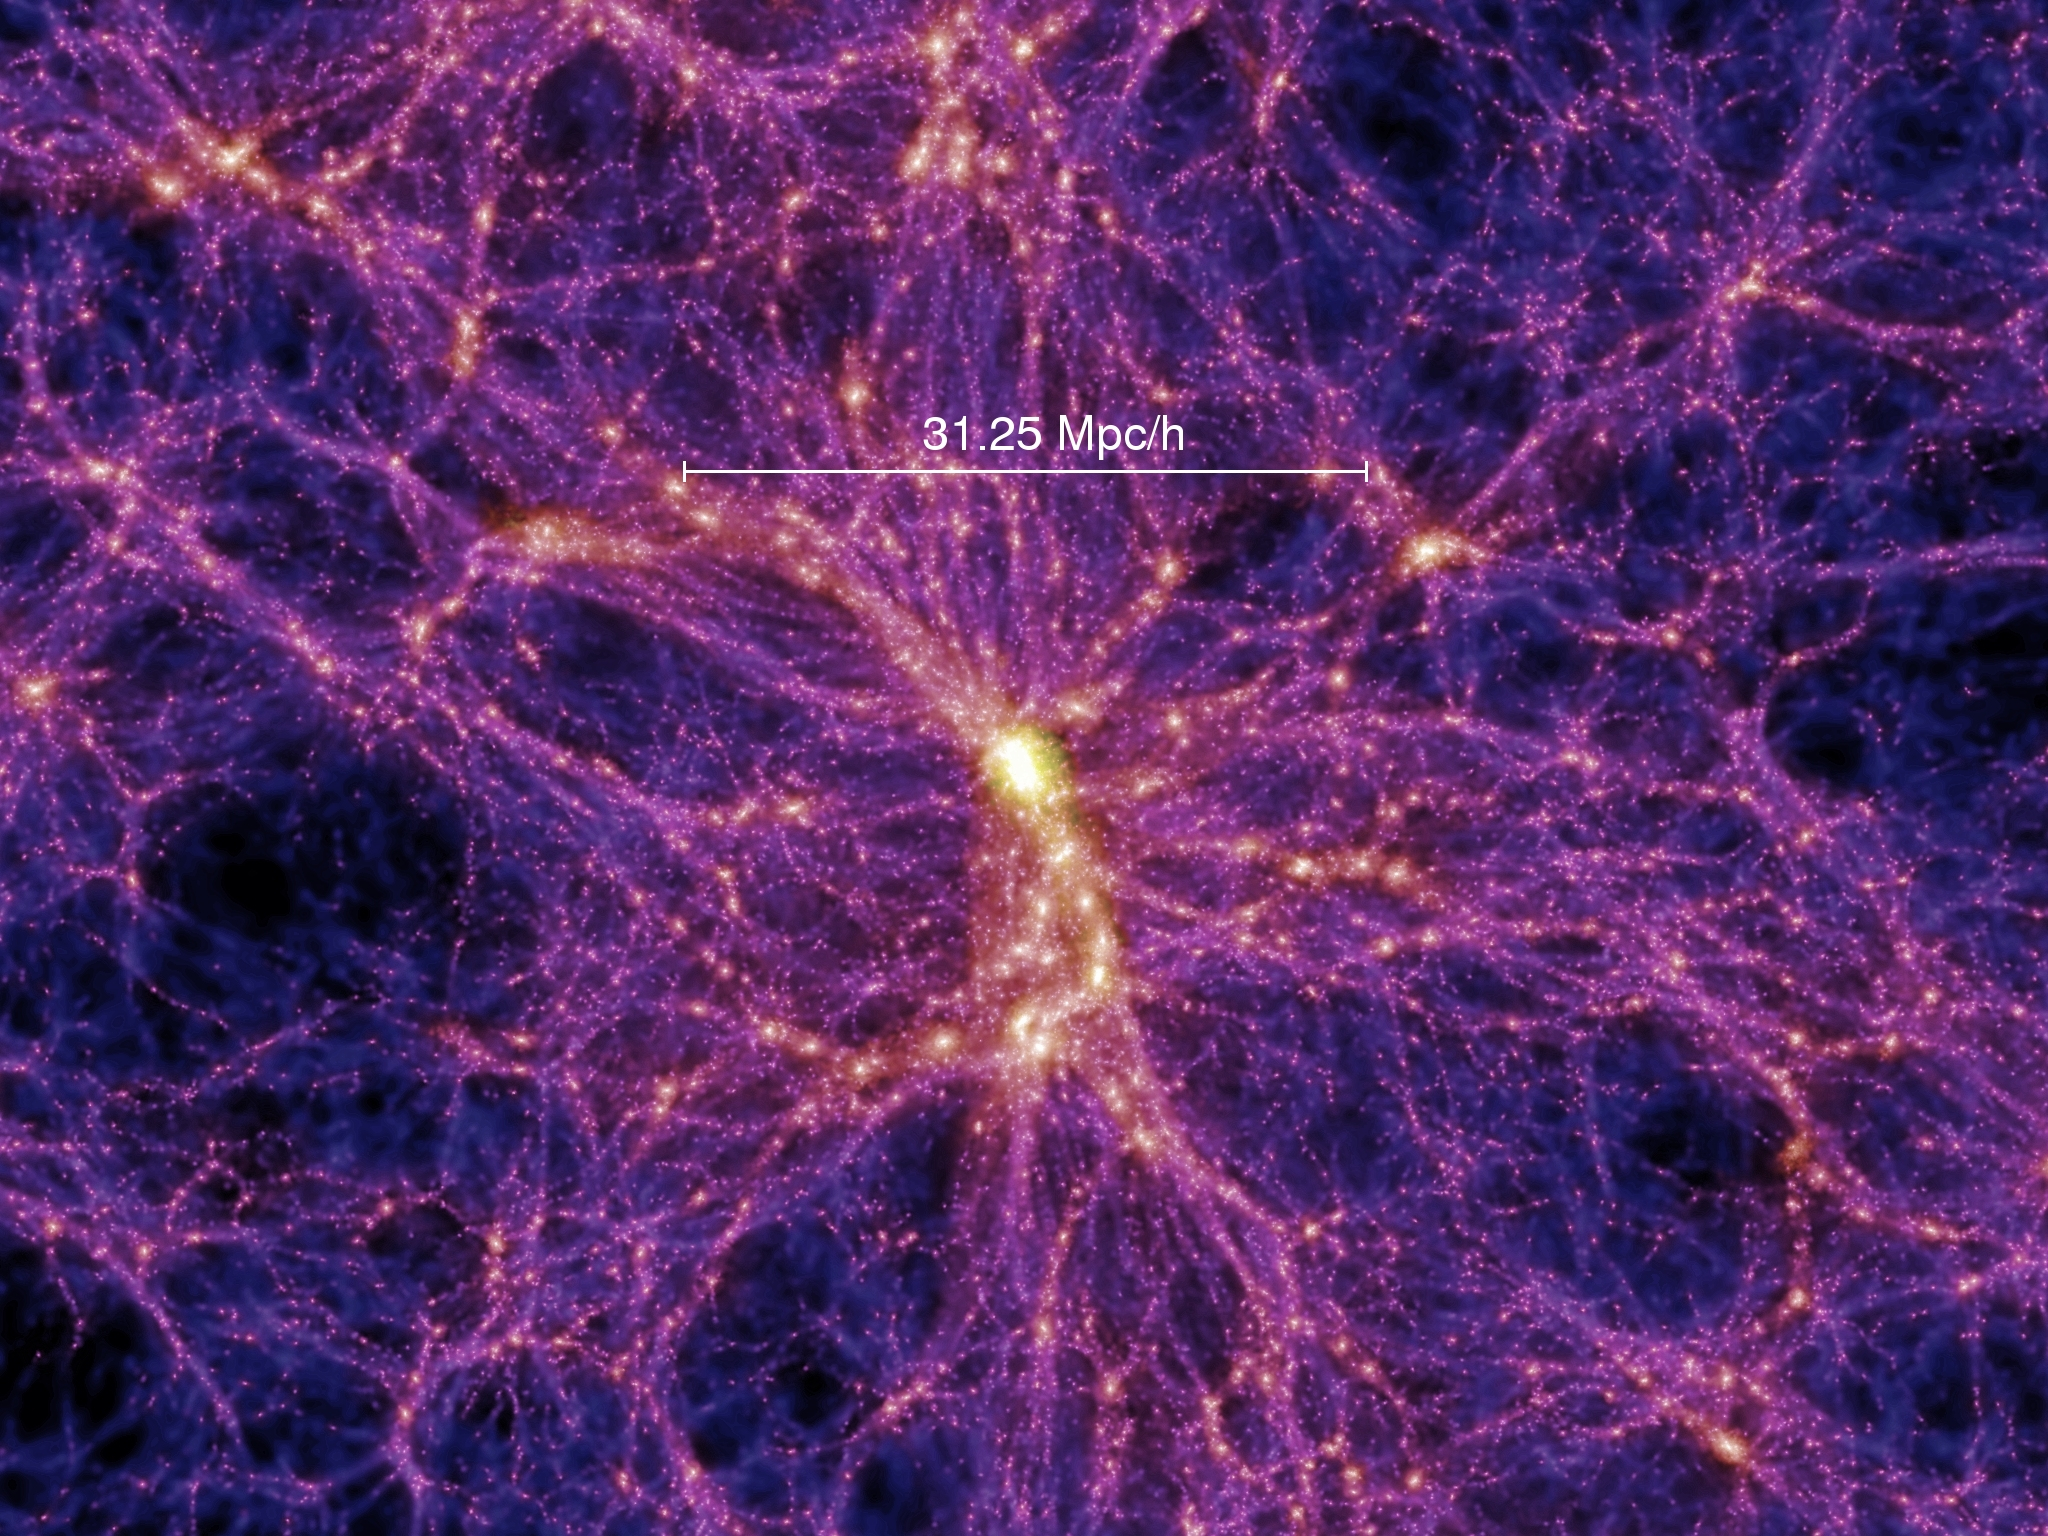


Questa immagine appare differente da quella che abbiamo graficato noi poichè abbiamo deciso di visualizzare solo le galassie (col comando Gal_Pos_data_0 = Data_0['pos']). Questa immagine, invece, mostra anche la componente di materia oscura del nostro Universo. 

Aspetta... MATERIA OSCURA???

Eh sì, materia oscura!!! C'è una parte di materia nell'Universo che non riusciamo a vedere e non sappiamo di cosa sia fatta. Per non parlare dell'energia oscura...

Chiedi a qualche tutor per maggiori informazioni.

# Conclusione

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/UxuPZyqF9qM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


Questo video mostra l'evoluzione temporale delle strutture dell'Universo.

Durante gli esperimenti di Fisica vengono raccolti dei dati grazie a diversi tipi di strumenti, come rivelatori di particelle, telescopi e satelliti. Per la costruzione di questi strumenti complicati, che costa molti soldi e molta fatica oltre che anni di lavoro, i fisici usano le **simulazioni** 

**Se sei arrivato fin qui e hai voglia di provare un'esperienza di analisi di veri dati di cosmologia per stimare alcuni dei parametri che descrivono l'Universo, chiedi a qualche tutor: ti procureranno un altro notebook.**

Per la creazione di questa attività ci siamo ispirati a: https://medium.com/swlh/create-your-own-n-body-simulation-with-python-f417234885e9